# Deep learning framework example: Movie Review Dataset

This notebook demonstrates how to use the deeplearning API to train and test the model on the [MNIST dataset](http://yann.lecun.com/exdb/mnist/).  This dataset contains hand written digits and their labels.

Before you run this notebook, you must ensure the corpus is installed.  Please see the `README.md` file for more information.

**Important**: Please see the Iris notebook example in the `zensols.deeplearn` API first, as it contains more explaination of how the framework is used.  The purpose of this notebook is to run the MNIST dataset and visualize the results.

In [1]:
# set up notebook environment
import sys
from pathlib import Path
app_root_dir = Path('..')
sys.path.append(str(app_root_dir / 'src'))
# add the deepnlp path
sys.path.append('../../../src/python')

## Configure and create the app specific facade

Now that the interpreter environment is set up, we can import local packages.

In [2]:
import logging
from zensols.config import ImportConfigFactory
from zensols.deeplearn import TorchConfig
from zensols.deeplearn.batch import TorchMultiProcessStash
from movie import CliFactory, ReviewModelFacade

# set the random seed so things are predictable
TorchConfig.set_random_seed()
# tell PyTorch how to fork processes that can access the GPU
TorchMultiProcessStash.init()

# create a command line application factory
cli_factory = CliFactory.instance(root_dir=app_root_dir)

def create_facade():
    """Create and return a facade with columns that fit a notebook.
 
    """
    # create a factoty that instantiates Python objects using a simple configuration (INI)
    #facade = ReviewModelFacade(config)
    facade = cli_factory.create_facade()
    # set console based logging
    facade.configure_jupyter(logging.WARNING)
    return facade

## Print information about 

Use the factory to create the model executor.  The `write` method gives statistics on the data set that is configured on the executor.

In [3]:
from zensols.config import Writable
# set indention level for human readable (pretty print like) output
Writable.WRITABLE_INDENT_SPACE = 2
facade = create_facade()
facade.write()

executor:
  model: Review
  feature splits:
    split stash splits:


2021-04-07 18:26:20,010 [zensols.multi.stash] feature_factory_stash: spawning work with chunk size 1402 across 8 workers


        dev: 1029 (9.2%)
        test: 2099 (18.7%)
        train: 8086 (72.1%)
        total: 11214


2021-04-07 18:27:01,122 [zensols.multi.stash] processed chunks in 40s
2021-04-07 18:27:01,353 [zensols.multi.stash] completed work in ReviewFeatureStash in 41s
2021-04-07 18:27:01,912 [zensols.deeplearn.batch.multi] batch_stash: spawning work with chunk size 20 across 3 workers


    total this instance: 11214
    keys consistent: True
  batch splits:
    split stash splits:
        dev: 6 (10.3%)
        test: 11 (19.0%)
        train: 41 (70.7%)
        total: 58


2021-04-07 18:27:01,973 [zensols.deeplearn.batch.multi] using torch multiproc pool: <multiprocessing.pool.Pool state=RUN pool_size=3>
2021-04-07 18:28:43,521 [zensols.deeplearn.batch.multi] processed chunks in 1 minute, 41s
2021-04-07 18:28:44,246 [zensols.multi.stash] completed work in BatchStash in 1 minute, 42s
2021-04-07 18:28:44,284 [zensols.deeplearn.model.executor.status] created model on cpu with use cuda: True, device: cuda:0


    total this instance: 58
    keys consistent: True
    delegate:
      name: batch_stash
      chunk_size: 0
      workers: 3
      batch_size: 200
      data_point_id_sets_path: ../data/batch/batch-point-keys.dat
      batch_limit: 9223372036854775807
      delegate_attr: True
      _has_data: True
      is_child: False
      _decoded_attributes: {'glove_50_embedding', 'label'}
      priming: False
  network settings:
    name: net_settings
    dropout: 0.2
    recurrent_settings:
      name: recurrent_settings
      dropout: 0.2
      network_type: lstm
      aggregation: max
      bidirectional: True
      hidden_size: 36
      num_layers: 1
    linear_settings:
      name: linear_settings
      dropout: 0.2
      out_features: 2
      middle_features:
        10
      proportions: True
      repeats: 1
  model settings:
    name: model_settings
    path: ../target/model
    learning_rate: 0.001
    epochs: 2
    max_consecutive_increased_count: 9223372036854775807
    nominal_la

## Train and test the model

Train and test the model with the default (low) number of epochs to make sure everything is working.

2021-04-07 18:42:42,995 [zensols.deeplearn.model.executor.status] resetting executor
2021-04-07 18:42:42,996 [zensols.deeplearn.model.facade] training...
2021-04-07 18:42:42,999 [zensols.deeplearn.model.executor.status] batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 0
2021-04-07 18:42:42,999 [zensols.deeplearn.model.executor.status] preparing datasets using iteration: gpu
2021-04-07 18:42:44,501 [zensols.deeplearn.model.executor.status] loaded 47 batches in 1s
2021-04-07 18:42:44,502 [zensols.deeplearn.model.executor.status] train/test sets: 41 6
2021-04-07 18:42:44,506 [zensols.deeplearn.model.executor.status] created model on cpu with use cuda: True, device: cuda:0
2021-04-07 18:42:44,525 [zensols.deeplearn.model.executor.status] training model <class 'movie.model.ReviewNetwork'> on cuda:0 for 2 epochs using learning rate 0.001
  0%|                                                                                             | 0/2 [00:00<?, ?it/s]2021-04-07 1

Name: Review: 1
Run index: 2
Learning rate: 0.001
  train:
    started: 04/07/2021 18:42:44:528852
    ended: 04/07/2021 18:42:46:998877
    batches: 41
    ave data points per batch: 197.2
    converged/epochs: 2/2
    ave/min loss: 165.11777/54.09750
    accuracy: 0.170 (1376/8086)
    micro: F1: 0.170, precision: 0.170, recall: 0.170
    macro: F1: 0.169, precision: 0.169, recall: 0.170
    weighted: F1: 0.169, precision: 0.169, recall: 0.170
  validation:
    batches: 6
    ave data points per batch: 171.5
    converged/epochs: 2/2
    ave/min loss: 119.53891/17.42568
    accuracy: 0.498 (512/1029)
    micro: F1: 0.498, precision: 0.498, recall: 0.498
    macro: F1: 0.332, precision: 0.249, recall: 0.500
    weighted: F1: 0.331, precision: 0.248, recall: 0.498
  test:
    started: 04/07/2021 18:42:47:437709
    ended: 04/07/2021 18:42:47:488572
    batches: 11
    ave data points per batch: 190.8
    converged/epochs: 1/1
    ave/min loss: 132.69687/60.18018
    accuracy: 0.507 (10

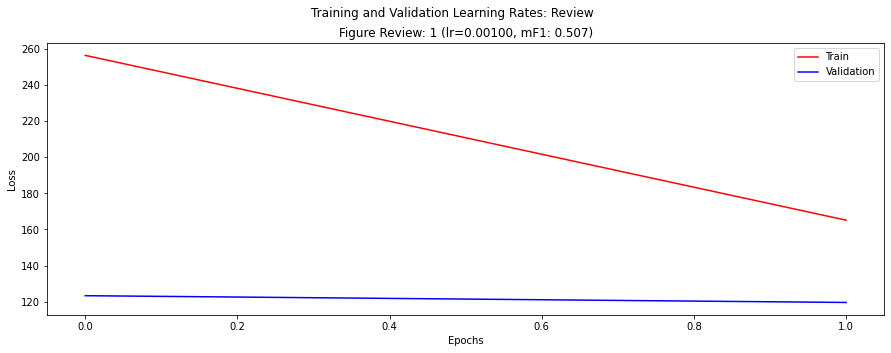

In [4]:
facade.epochs = 2
facade.train()
facade.test()
facade.write_result()
facade.plot_result()
facade.persist_result()

## Tune hyperparameters

Set model parameters to get a feel for where they need to be before changing features.

2021-04-07 18:42:57,662 [zensols.deeplearn.model.executor.status] resetting executor
2021-04-07 18:42:57,663 [zensols.deeplearn.model.facade] training...
2021-04-07 18:42:57,664 [zensols.deeplearn.model.executor.status] batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 2
2021-04-07 18:42:57,665 [zensols.deeplearn.model.executor.status] train/test sets: 41 6
2021-04-07 18:42:57,683 [zensols.deeplearn.model.executor.status] created model on cpu with use cuda: True, device: cuda:0
2021-04-07 18:42:57,698 [zensols.deeplearn.model.executor.status] training model <class 'movie.model.ReviewNetwork'> on cuda:0 for 75 epochs using learning rate 0.001
  0%|                                                                                            | 0/75 [00:00<?, ?it/s]2021-04-07 18:42:57,700 [zensols.deeplearn.model.executor.status] watching update file ../target/update.json
tr:114.589|va min:92.324|va:92.159 \/: 100%|████████████████████████████████████████████| 75/75 [0

Name: Review: 1
Run index: 2
Learning rate: 0.001
  train:
    started: 04/07/2021 18:42:57:701328
    ended: 04/07/2021 18:45:03:284841
    batches: 41
    ave data points per batch: 197.2
    converged/epochs: 74/75
    ave/min loss: 114.50596/27.85959
    accuracy: 0.691 (5591/8086)
    micro: F1: 0.691, precision: 0.691, recall: 0.691
    macro: F1: 0.690, precision: 0.696, recall: 0.692
    weighted: F1: 0.690, precision: 0.696, recall: 0.691
  validation:
    batches: 6
    ave data points per batch: 171.5
    converged/epochs: 75/75
    ave/min loss: 92.15863/11.82902
    accuracy: 0.729 (750/1029)
    micro: F1: 0.729, precision: 0.729, recall: 0.729
    macro: F1: 0.726, precision: 0.738, recall: 0.729
    weighted: F1: 0.726, precision: 0.738, recall: 0.729
  test:
    started: 04/07/2021 18:45:03:907212
    ended: 04/07/2021 18:45:03:958374
    batches: 11
    ave data points per batch: 190.8
    converged/epochs: 1/1
    ave/min loss: 106.97967/44.89465
    accuracy: 0.709 

movie.model.ReviewNetwork (2)

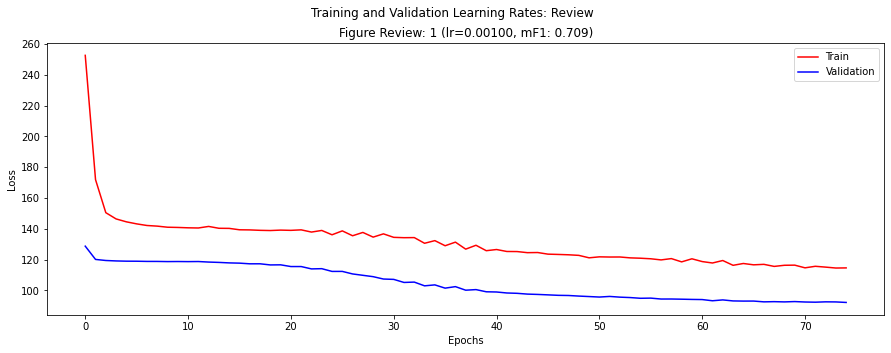

In [5]:
facade.learning_rate = 0.001
facade.epochs = 75
facade.dropout = 0.3
facade.train()
facade.test()
facade.write_result()
facade.plot_result()

In [ ]:
facade.epochs = 60
facade.embedding = 'word2vec_300_embedding'
facade.train()
facade.test()
facade.write_result()
facade.plot_result()
facade.persist_result()

In [ ]:
facade.embedding = 'bert_embedding'
facade.train()
facade.test()
facade.write_result()
facade.plot_result()